# Task 6.4. Gradients (use of the first image derivative) - 4.1 - 4.7
---
***Author: Piotr Skalski***

## Imports

In [1]:
import numpy as np
import scipy.io as sio
import cv2
import os
import pprint

import display_util

import matplotlib.pyplot as plt
%matplotlib inline

## Settings

In [2]:
SOURCE_DIR = "./../data/"
IMAGE_NAMES = [
    "kw.bmp",
    "jet.bmp"
]
KERNEL_NAME = "maskiPP.mat"

## Loading image and data

In [3]:
# building paths to files
image_paths = [os.path.join(SOURCE_DIR, file) for file in IMAGE_NAMES]
kernel_path = os.path.join(SOURCE_DIR, KERNEL_NAME)

# loading image
images = [cv2.imread(path, 0) for path in image_paths]
# loading kernel data
kernels_data = sio.loadmat(kernel_path)

In [4]:
pprint.pprint(kernels_data)

{'P1': array([[-1,  0,  1],
       [-1,  0,  1],
       [-1,  0,  1]], dtype=int16),
 'P2': array([[-1, -1, -1],
       [ 0,  0,  0],
       [ 1,  1,  1]], dtype=int16),
 'R1': array([[ 0,  0,  0],
       [-1,  0,  0],
       [ 0,  1,  0]], dtype=int16),
 'R2': array([[ 0,  0,  0],
       [ 0,  0, -1],
       [ 0,  1,  0]], dtype=int16),
 'S1': array([[-1,  0,  1],
       [-2,  0,  2],
       [-1,  0,  1]], dtype=int16),
 'S2': array([[-1, -2, -1],
       [ 0,  0,  0],
       [ 1,  2,  1]], dtype=int16),
 '__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Tue Nov 03'
               b' 11:20:44 2009',
 '__version__': '1.0'}


## Auxiliary functions

In [5]:
def apply_gradient(image, kernel):
    return np.abs(cv2.filter2D(image, -1, kernel))

## Roberts gradient

### Settings

In [6]:
IMAGE = images[0]
KERNELS = ["R1", "R2"]

### Implementation

In [7]:
# Initiation of the list of images
output_images = [IMAGE]
# Initiation of the list of images names
output_images_names = ["original image"]
for kernel_name in KERNELS:
    kernel_data = kernels_data[kernel_name]
    output_images.append(apply_gradient(IMAGE, kernel_data))
    output_images_names.append(kernel_name)

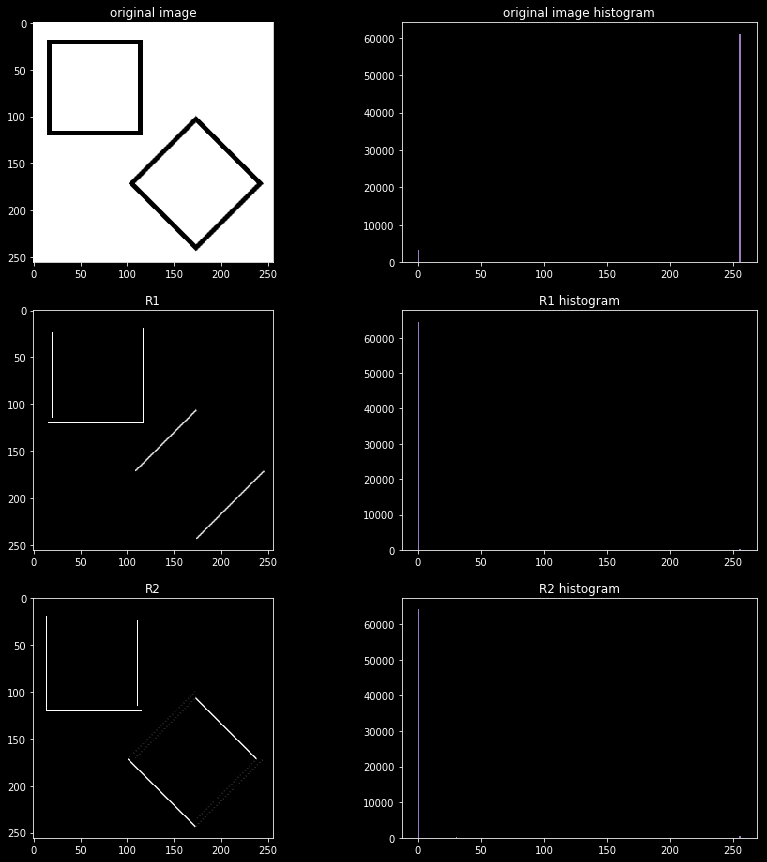

In [8]:
display_util.images_with_histograms(files_list=output_images, names_list=output_images_names)

## Prewitt gradient

### Settings

In [9]:
IMAGE = images[0]
KERNELS = ["P1", "P2"]

### Implementation

In [10]:
# Initiation of the list of images
output_images = [IMAGE]
# Initiation of the list of images names
output_images_names = ["original image"]
for kernel_name in KERNELS:
    kernel_data = kernels_data[kernel_name]
    output_images.append(apply_gradient(IMAGE, kernel_data))
    output_images_names.append(kernel_name)

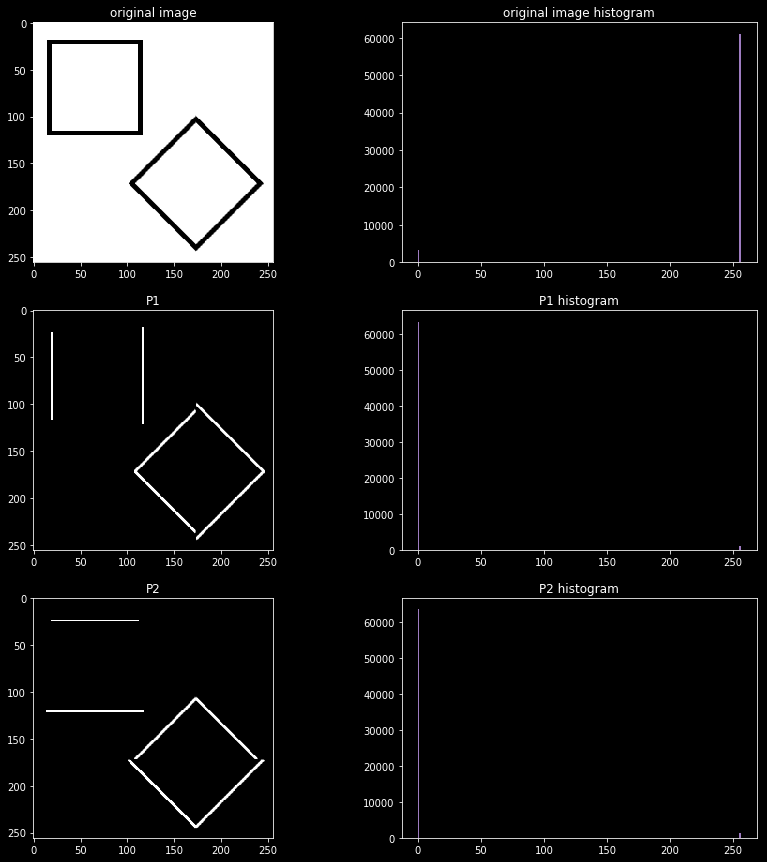

In [11]:
display_util.images_with_histograms(files_list=output_images, names_list=output_images_names)

## Sobel gradient

### Settings

In [12]:
IMAGE = images[0]
KERNELS = ["S1", "S2"]

### Implementation

In [13]:
# Initiation of the list of images
output_images = [IMAGE]
# Initiation of the list of images names
output_images_names = ["original image"]
for kernel_name in KERNELS:
    kernel_data = kernels_data[kernel_name]
    output_images.append(apply_gradient(IMAGE, kernel_data))
    output_images_names.append(kernel_name)

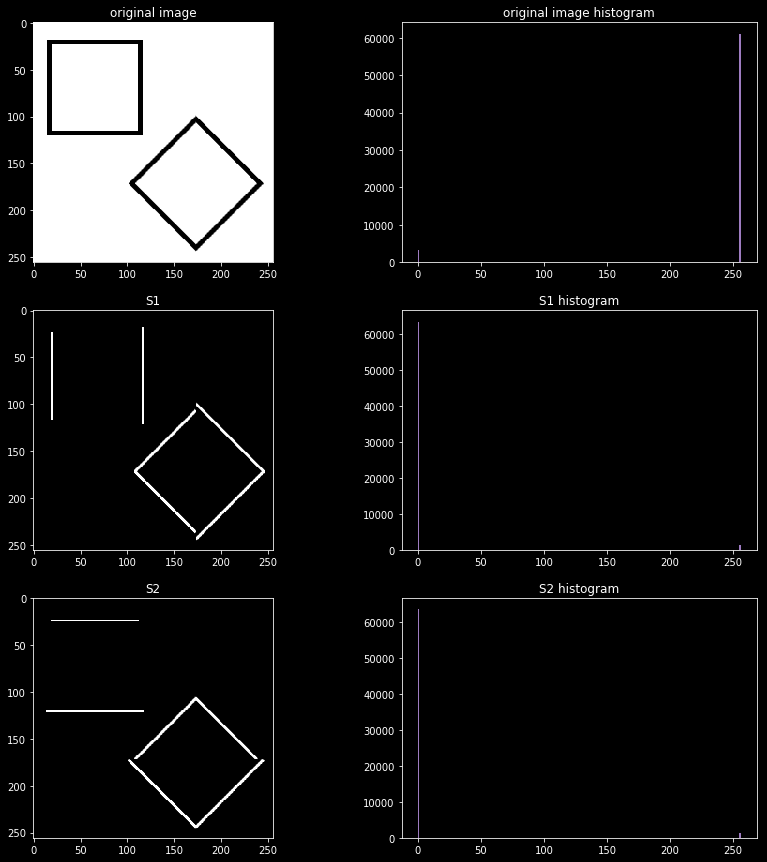

In [14]:
display_util.images_with_histograms(files_list=output_images, names_list=output_images_names)

### Using built-in Sobel function

### Settings

In [15]:
IMAGE = images[0]

### Implementation

In [16]:
images_to_display = [
    IMAGE,
    cv2.Sobel(IMAGE, cv2.CV_64F, 1, 0, ksize=3),
    cv2.Sobel(IMAGE, cv2.CV_64F, 0, 1, ksize=3)
]

names = [
    "original image",
    "X",
    "Y"
]

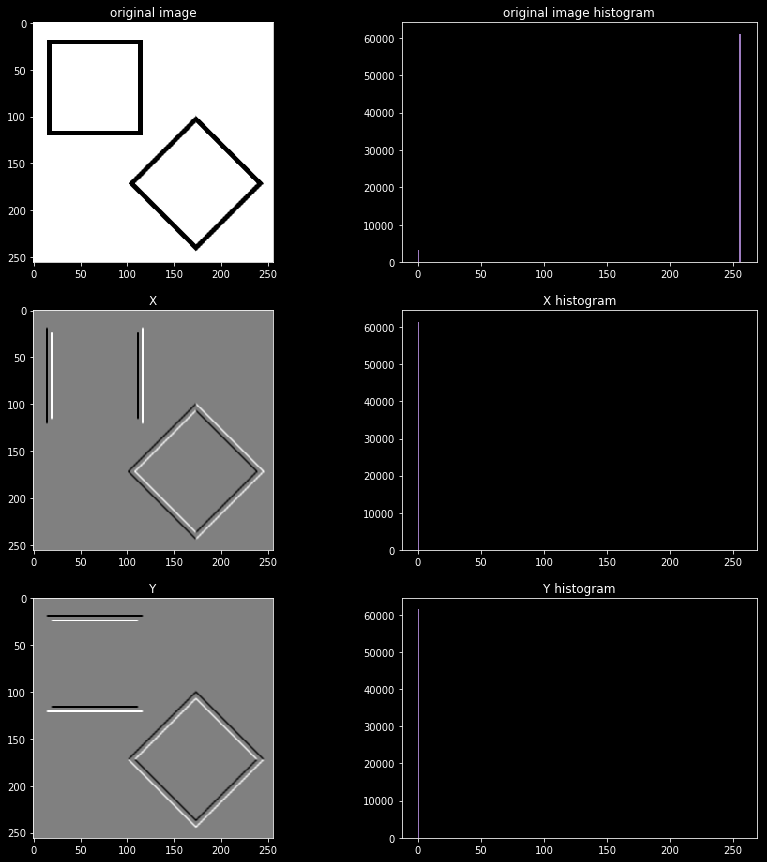

In [17]:
display_util.images_with_histograms(files_list=images_to_display, names_list=names)

### Combined sobel filter

### Settings

In [19]:
IMAGE = images[0]

### Implementation

In [21]:
sobel_x = apply_gradient(IMAGE, kernels_data["S1"])
sobel_y = apply_gradient(IMAGE, kernels_data["S2"])

images_to_display = [
    IMAGE,
    np.power(np.power(sobel_x, 2) + np.power(sobel_y, 2), 0.5),
    np.abs(sobel_x + sobel_y)
]

names = [
    "original image",
    "root of the sum of squares",
    "absolute value of the sum"
]

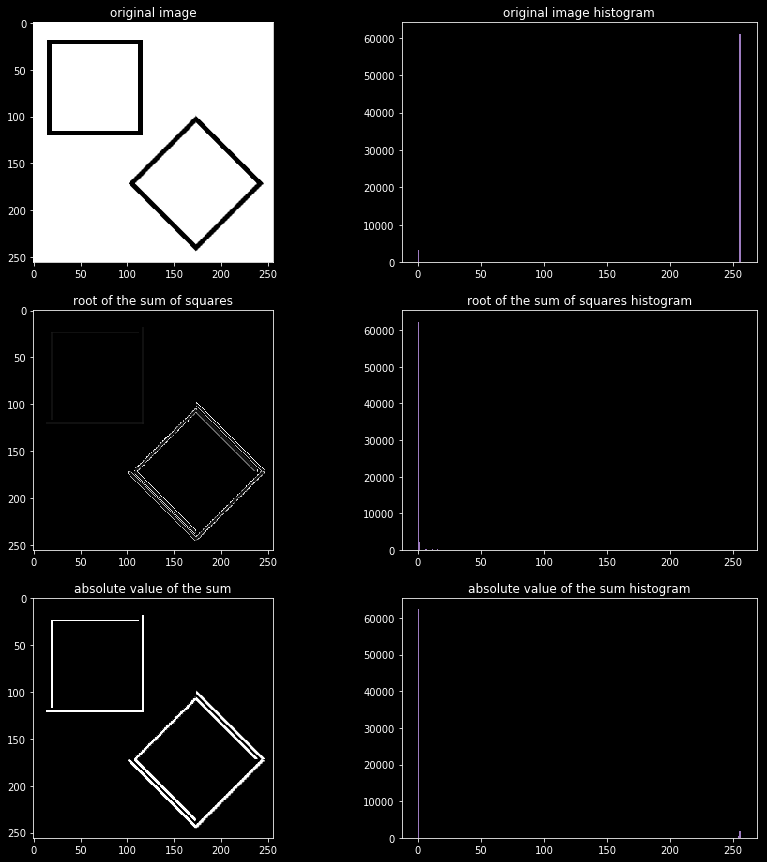

In [22]:
display_util.images_with_histograms(files_list=images_to_display, names_list=names)

## Resources

1. [Image edge detection: Sobel and Laplacian](https://www.bogotobogo.com/python/OpenCV_Python/python_opencv3_Image_Gradient_Sobel_Laplacian_Derivatives_Edge_Detection.php)
2. [Image Gradients](https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_gradients/py_gradients.html)
3. [Sobel operator](https://en.wikipedia.org/wiki/Sobel_operator)